# Annual Income

To do
* Tune models
* Deal with missing data

https://archive.ics.uci.edu/dataset/2/adult

## Preliminaries

### Imports

In [ ]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

### Import the data

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2).data.original 

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory data analysis

In [4]:
adult_eda = adult.copy()

In [5]:
adult_eda['income'] = adult_eda['income'].apply(lambda s: s[:-1] if s[-1]=='.' else s)

In [6]:
adult_eda = adult_eda.replace('?', np.nan)

In [7]:
adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
adult_eda.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
adult_eda.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<Axes: title={'center': 'Counts of high and low income observations containing null values'}, xlabel='income'>

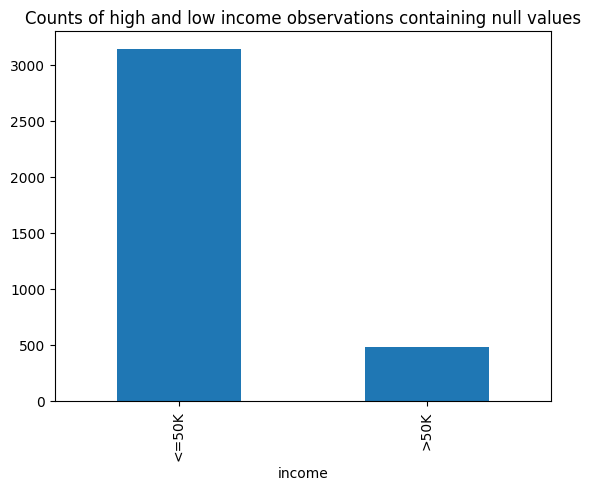

In [10]:
nulls = adult_eda[adult_eda.isna().any(axis=1)]
nulls['income'].value_counts().plot.bar(title='Counts of high and low income observations containing null values')

In [11]:
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
num_vars = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

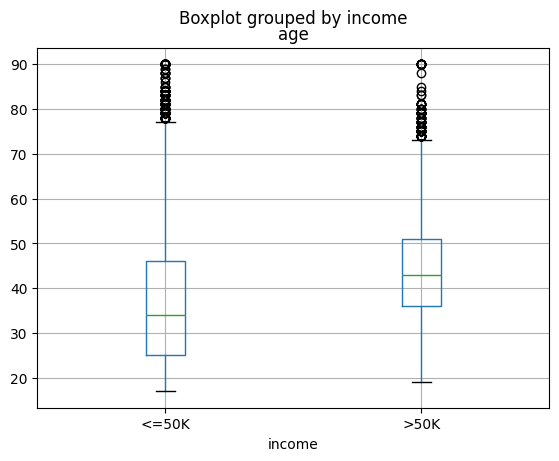

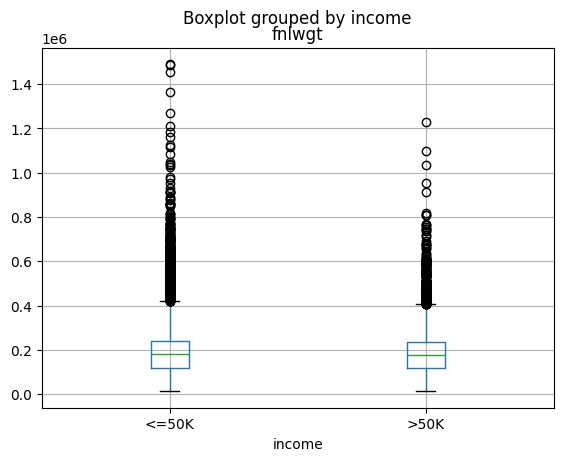

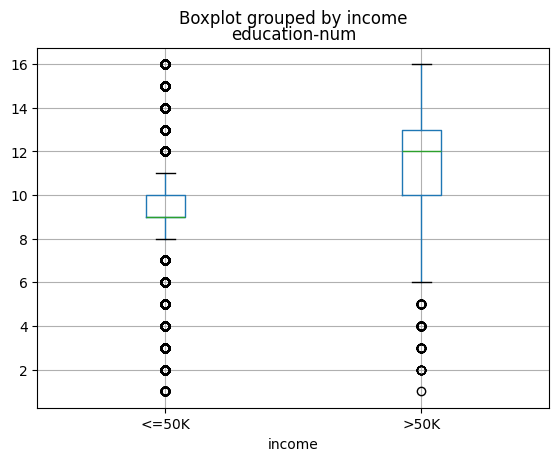

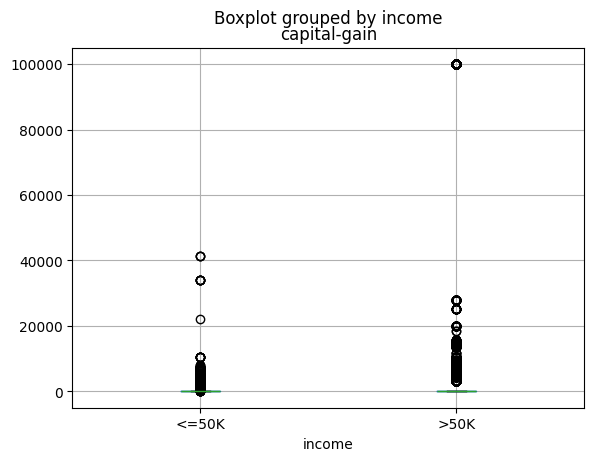

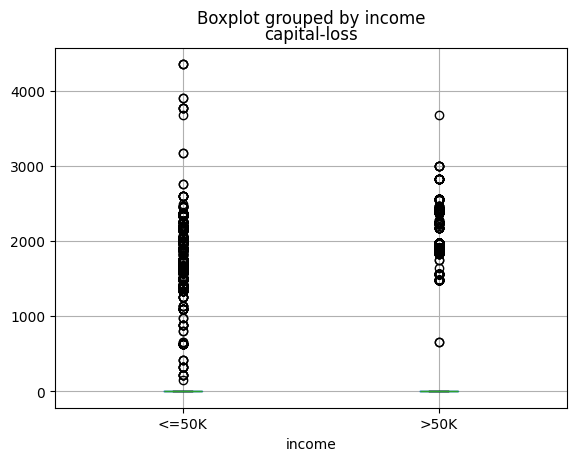

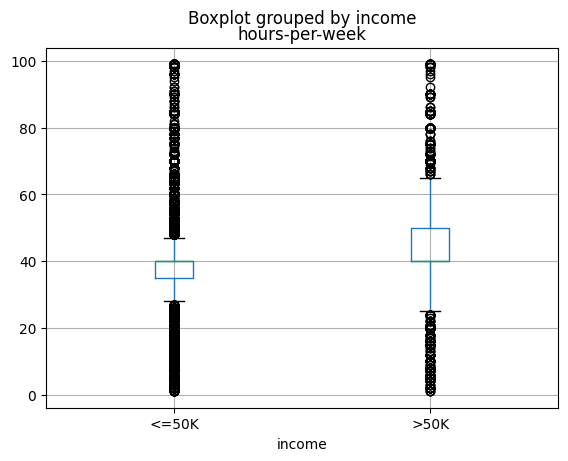

In [12]:
for num_var in num_vars:
    adult_eda.boxplot(column=num_var, by='income')

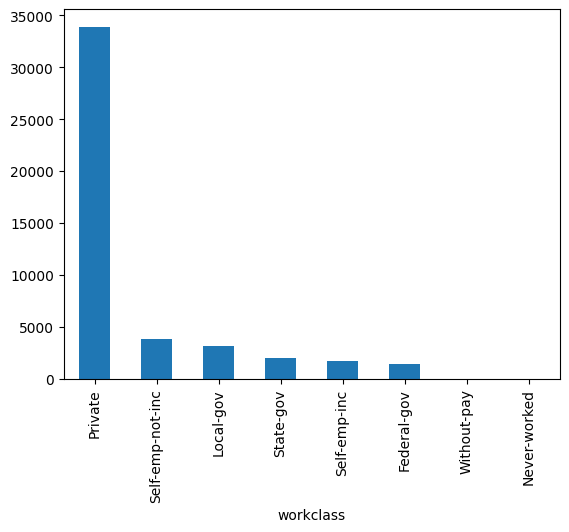

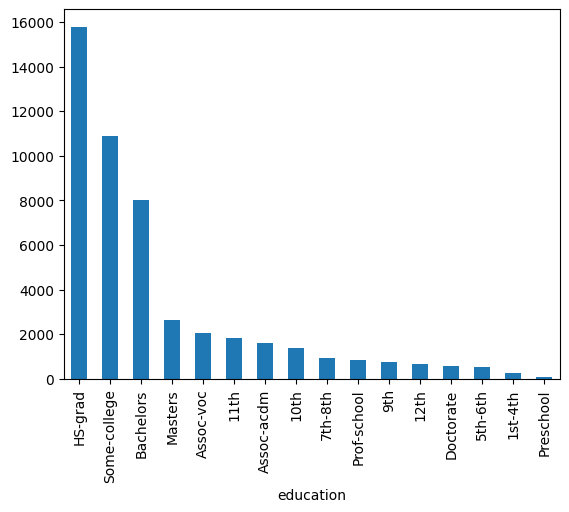

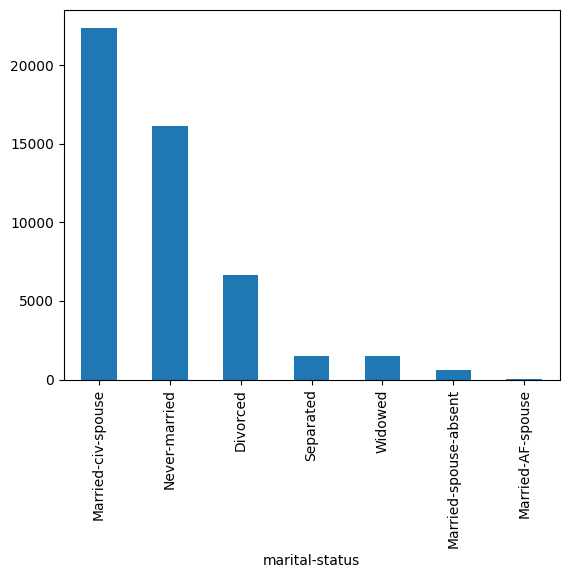

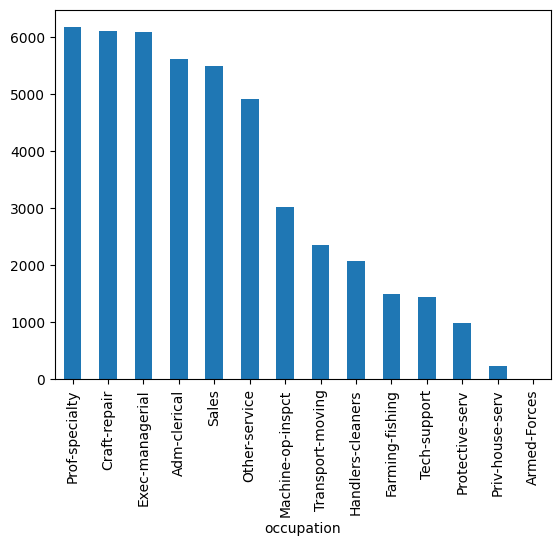

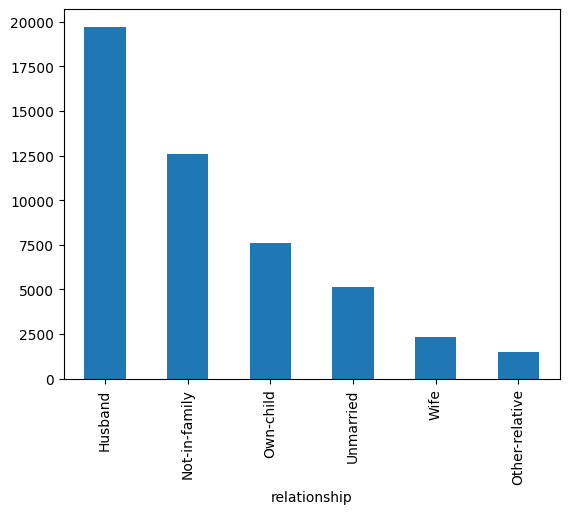

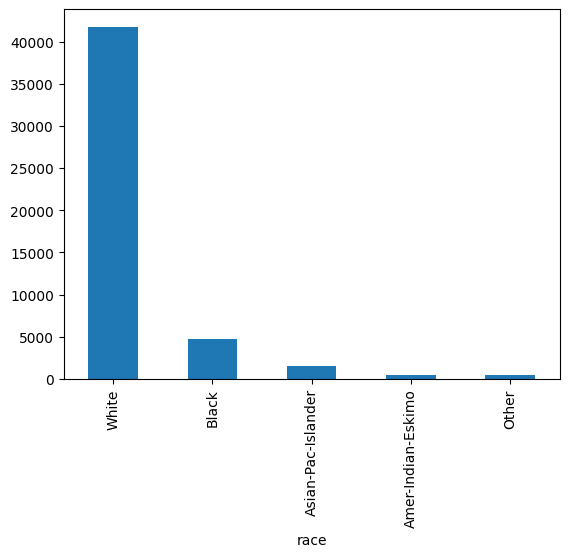

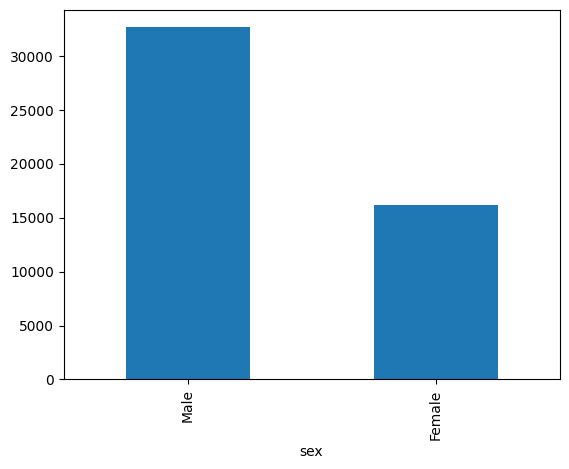

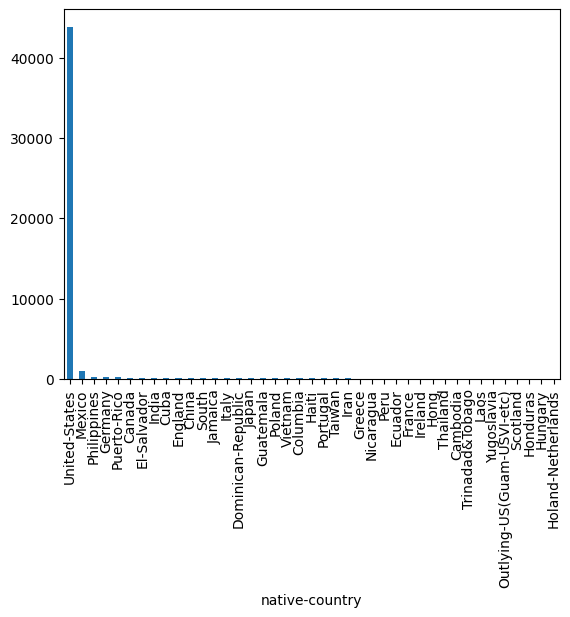

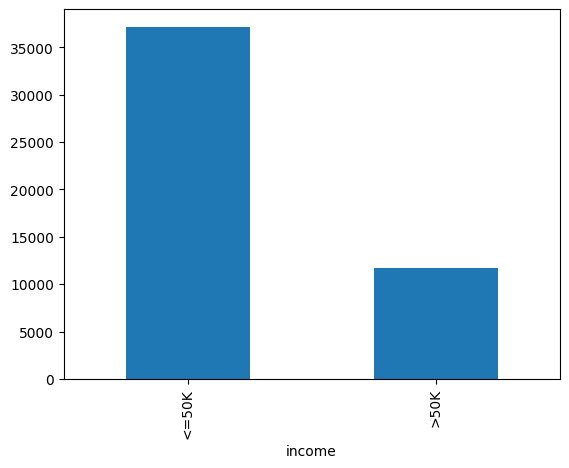

In [13]:
for cat_var in cat_vars:
    adult_eda[cat_var].value_counts().plot.bar()
    plt.show()

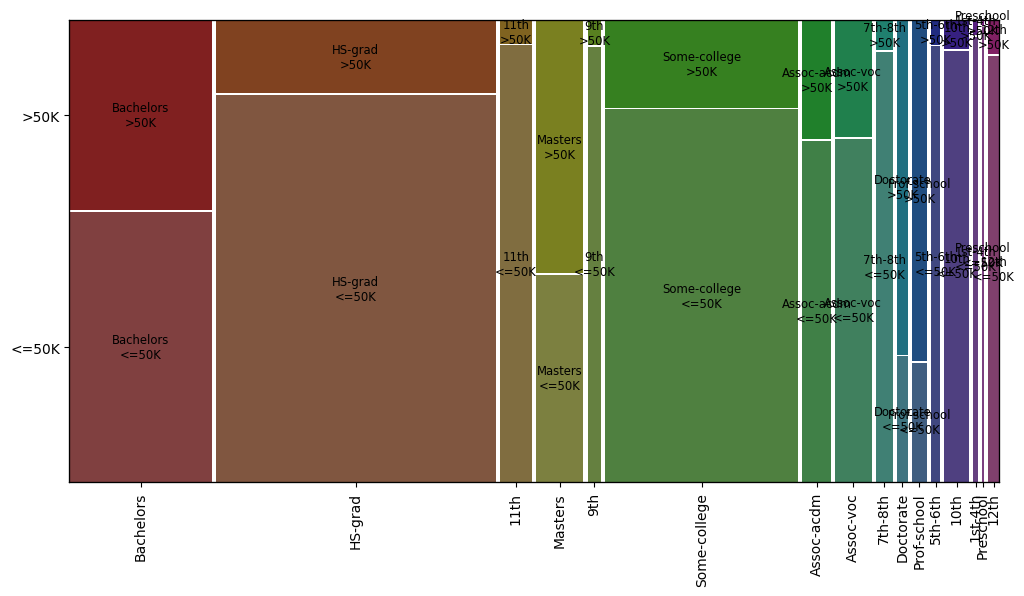

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['education', 'income']], ['education', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

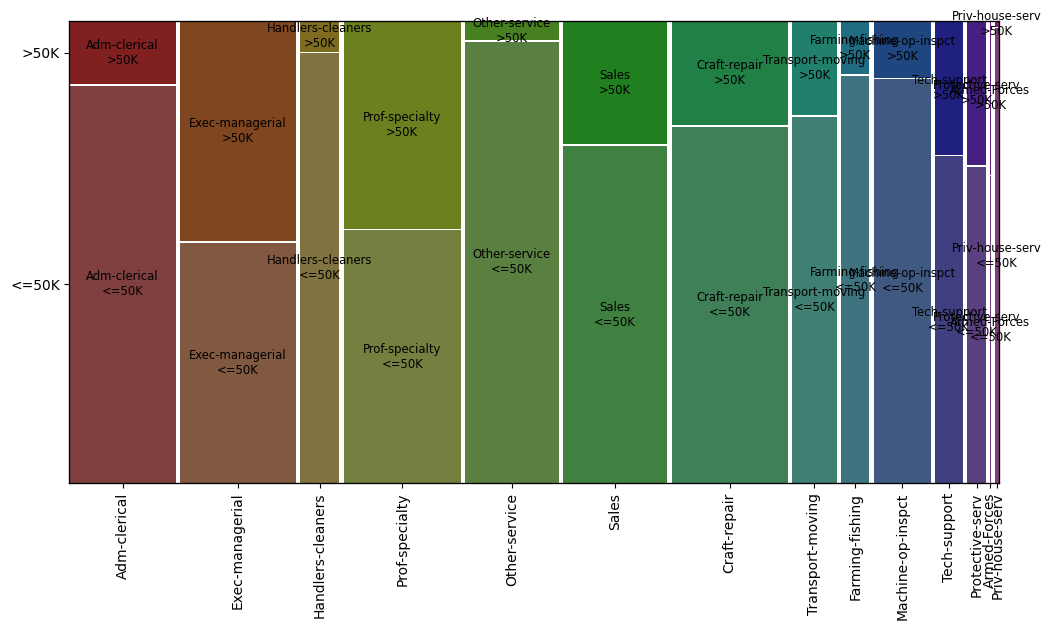

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['occupation', 'income']], ['occupation', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

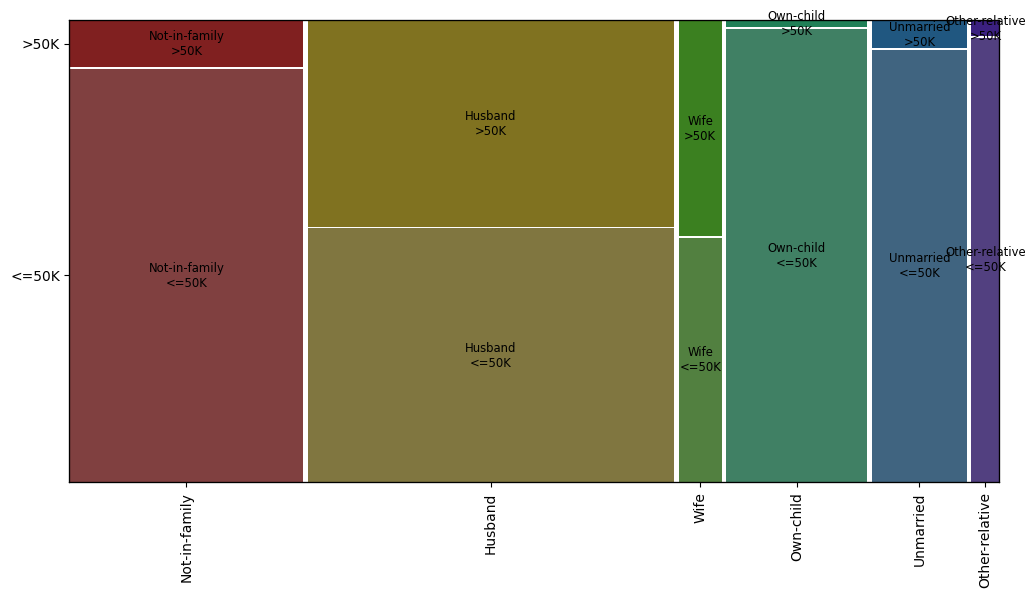

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['relationship', 'income']], ['relationship', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

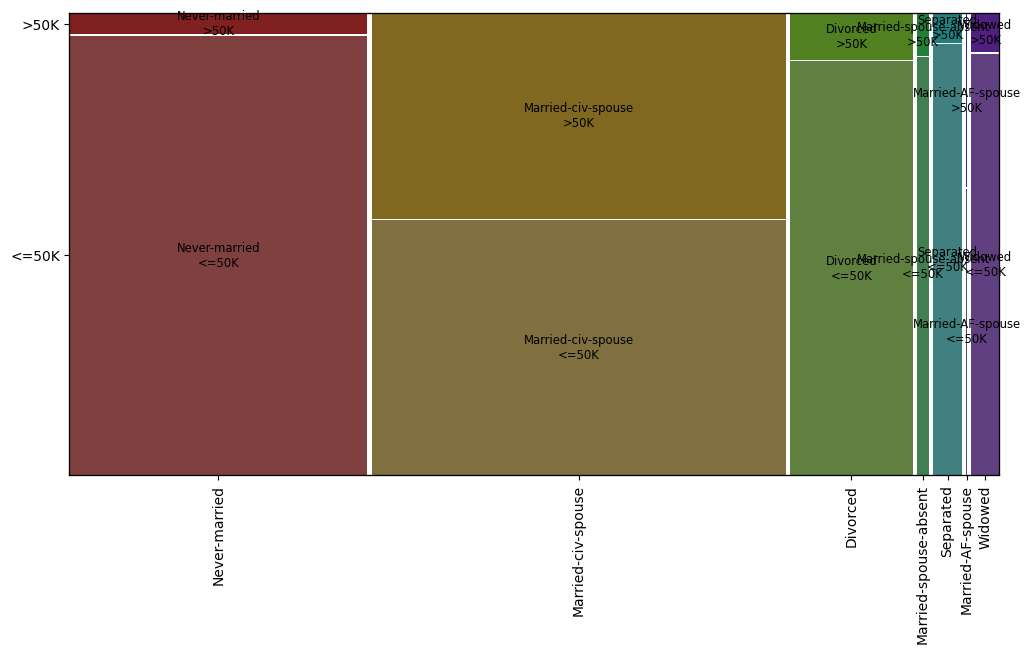

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['marital-status', 'income']], ['marital-status', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

In [18]:
adult_eda['age group'] = adult_eda['age'].apply(lambda n: f"{n//10}0s")
income_count_age = adult_eda[['age group', 'income']].groupby(['age group', 'income']).size().reset_index().rename({0: 'count'}, axis=1) #.plot(kind='bar', title="Counts for age group, income groups")
high_income_count_age = income_count_age[income_count_age['income'] == '>50K']
low_income_count_age = income_count_age[income_count_age['income'] == '<=50K']


Text(0.5, 1.0, 'Count of high/low earners by age group')

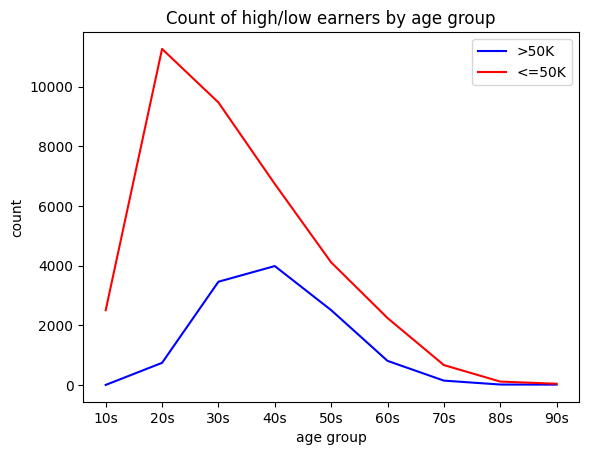

In [19]:
fig, ax = plt.subplots()
ax.plot(high_income_count_age['age group'], high_income_count_age['count'], c='b', label='>50K')
ax.plot(low_income_count_age['age group'], low_income_count_age['count'], c='r', label='<=50K')
ax.set_xlabel('age group')
ax.set_ylabel('count')
ax.legend()
ax.set_title('Count of high/low earners by age group')

## Preprocessing

In [20]:
adult.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [21]:
adult.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [22]:
adult['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

### Utility methods

In [23]:
# Generalized into private, public, self-employed, business owner and unemployed
def generalize_workclass(workclass):
    if (workclass=="Private" or workclass=="Self-emp-not-inc" or workclass=="Self-emp-inc"):
        return workclass
    elif (workclass=="Federal-gov" or workclass=="Local-gov" or workclass=="State-gov"):
        return "Public"
    elif (workclass=="Without-pay" or workclass=="Never-worked"):
        return "Unemployed"
    return "?"

In [24]:
# Generalized into preschool, elementary/middle school, high school, university and vocational
def generalize_education(edu):
    if (edu=="Preschool"):
        return "Preschool"
    elif (edu=="1st-4th" or edu=="5th-6th" or edu=="7th-8th"):
        return "School"
    elif (edu=="9th" or edu=="10th" or edu=="11th" or edu=="12th" or edu=="HS-grad"):
        return "High-school"
    elif (edu == "Bachelors" or edu=="Some-college" or edu=="Masters" or edu=="Doctorate" or edu=="Prof-school" or edu=="Assoc-acdm"):
        return "University"
    elif (edu=="Assoc-voc"):
        return "Vocational"
    return "?"

In [25]:
# Generalized into married and not married
def generalize_marital_status(status):
    if (status=="Married-civ-spouse" or status=="Married-spouse-absent" or status=="Married-AF-spouse"):
        return "Married"
    elif (status=="Divorced" or status=="Never-married" or status=="Separated" or status=="Widowed"):
        return "Not-married"
    return "?"

In [26]:
# Generalized into skilled, unskilled, military/protection and farming/fishing
def generalize_occupation(occupation):
    if (occupation=="Exec-managerial" or occupation=="Prof-specialty" or occupation=="Craft-repair" or occupation=="Tech-support"):
        return "Skilled"
    elif (occupation=="Other-service" or occupation=="Handlers-cleaners" or occupation=="Adm-clerical" or occupation=="Transport-moving" or occupation=="Priv-house-serv" or occupation=="Machine-op-inspct" or occupation=="Sales"):
        return "Unskilled"
    elif (occupation=="Protective-serv" or occupation=="Armed-Forces"):
        return "Mil-pro-serv"
    elif (occupation=="Farming-fishing"):
        return occupation
    return "?"

In [27]:
# Generalized into family and non-family
def generalize_relationship(relationship):
    if (relationship=="Wife" or relationship=="Own-child" or relationship=="Husband" or relationship=="Other-relative"):
        return "Family"
    elif(relationship=="Not-in-family" or relationship=="Unmarried"):
        return "Non-family"
    return "?"

In [28]:
'''
Countries have been classified following the IMF's 2024 groupings (https://www.imf.org/en/Publications/WEO/weo-database/2024/April/groups-and-aggregates) 
with the exception of "Outlying-US(Guam-USVI-etc)" which is not categorized by the IMF and which has been included in the "Developing" group here.
'''
def generalize_native_country(country):
    if (country=="United-States" or country=="England" or country=="Canada" or country=="Germany" or country=="Japan" or country=="Greece" or country=="Italy" or country=="Portugal" or country=="Puerto-Rico" or country=="Ireland" or country=="France" or country=="Taiwan" or country=="Scotland" or country=="Hong" or country=="Holand-Netherlands"):
        return "Advanced"
    elif (country=="Cambodia" or country=="Outlying-US(Guam-USVI-etc)" or country=="India" or country=="South" or country=="China" or country=="Cuba" or country=="Iran" or country=="Honduras" or country=="Philippines" or country=="Poland" or country=="Jamaica" or country=="Vietnam" or country=="Mexico" or country=="Dominican-Republic" or country=="Laos" or country=="Ecuador" or country=="Haiti" or country=="Columbia" or country=="Hungary" or country=="Guatemala" or country=="Nicaragua" or country=="Thailand" or country=="Yugoslavia" or country=="El-Salvador" or country=="Trinadad&Tobago" or country=="Peru"):
        return "Developing"
    return "?"

In [29]:
def generalize(df):
    df["workclass"] = df['workclass'].apply(lambda workclass: generalize_workclass(workclass))
    df["education"] = df['education'].apply(lambda education: generalize_education(education))
    df["marital-status"] = df['marital-status'].apply(lambda marital_status: generalize_marital_status(marital_status))
    df["occupation"] = df['occupation'].apply(lambda occupation: generalize_occupation(occupation))
    df['relationship'] = df['relationship'].apply(lambda relationship: generalize_relationship(relationship))
    df['native-country'] = df['native-country'].apply(lambda native_country: generalize_native_country(native_country))
    return df

### Pipeline

In [30]:
preprocessed = adult.copy()

In [31]:
# Cleaning data
preprocessed["income"] = preprocessed["income"].apply(lambda s: s[0:-1] if s[-1]=="." else s)
preprocessed = preprocessed.replace('?', np.nan)
preprocessed = preprocessed.dropna()

In [32]:
preprocessed = generalize(preprocessed)

In [33]:
# Creating dummy variables for categorical predictors
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
preprocessed = pd.get_dummies(preprocessed, columns=cat_vars, drop_first=True, dtype=int)

In [34]:
preprocessed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Public,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Unemployed,...,occupation_Skilled,occupation_Unskilled,relationship_Non-family,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Developing,income_>50K
0,39,77516,13,2174,0,40,1,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,50,83311,13,0,0,13,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [35]:
preprocessed.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Public', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_Unemployed',
       'education_Preschool', 'education_School', 'education_University',
       'education_Vocational', 'marital-status_Not-married',
       'occupation_Mil-pro-serv', 'occupation_Skilled', 'occupation_Unskilled',
       'relationship_Non-family', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Male', 'native-country_Developing',
       'income_>50K'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed.drop('income_>50K', axis=1), preprocessed.loc[:, "income_>50K"], test_size=0.2, random_state=42)

## Modelling

### Metrics for comparison

There are a number of different metrics that can be used to evaluate trained models (e.g. accuracy, error rate, sensitivity, precision) and selecting one depends on the broader context. For example, if we are predicting whether people have a genetic predisposition to a disease so that they can be invited for screening it is much more desirable to invite someone to a screening who doesn't need it rather than not invite someone to a screening who does need it. In this scenario specificity (TN/TN + FP) might be a desirable metric to maximise.
For the purposes of this project, I will assume that I am working on behalf of a luxury retailer that would like to target an advertising campaign at individuals with a relatively high income. The key here is to ensure that as much of the advertising budget as possible is spent on serving advertisements to people who are on a high income. Thus precision (TP / TP + FP) is a suitable metric for the purposes of this project.

### Utility methods

In [37]:
def error_rate(actual, predicted):
    return np.mean(actual != predicted)

In [38]:
def labelled_confusion_matrix(actual, predicted):
    columns = pd.MultiIndex.from_tuples([("predicted", "income_<=50K"), ("predicted", "income_>50K")])
    indicies = pd.MultiIndex.from_tuples([("actual", "income_<=50K"), ("actual", "income_>50K")])
    return pd.DataFrame(confusion_matrix(actual, predicted), index=indicies, columns=columns)

In [39]:
def recall(actual, predicted):
    df = pd.DataFrame({"actual": actual, "predicted": predicted})
    tp = df[(df.actual == 1) & (df.predicted==1)].shape[0]
    fn = df[(df.actual==1) & (df.predicted==0)].shape[0]
    return tp/(tp + fn)

In [40]:
def precision(actual, predicted):
    df = pd.DataFrame({"actual": actual, "predicted": predicted})
    tp = df[(df.actual == 1) & (df.predicted==1)].shape[0]
    fp = df[(df.actual==0) & (df.predicted==1)].shape[0]
    return tp/(tp + fp)

In [41]:
def f1(actual, predicted):
    pr = precision(actual, predicted)
    re = recall(actual, predicted)
    return (2 * pr * re)/(pr + re)

In [42]:
def evaluate_model(actual, predicted):
    print(f"***Confusion Matrix***\n{labelled_confusion_matrix(actual, predicted)}\n\n***Error rate***\n{error_rate(actual, predicted)}\n\n***Recall***\n{recall(actual, predicted)}\n\n***Precision***\n{precision(actual, predicted)}\n\n***F1 score***\n{f1(actual, predicted)}")

### KNN

In [127]:
knn = KNeighborsClassifier()
distributions = {"n_neighbors": [2, 4, 8, 16, 32]}
knn_search = RandomizedSearchCV(knn, distributions, random_state=0)
knn_search.fit(X_train, y_train)

/Users/jon.wong/Documents/Personal Development/Kaggle/annual-income/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 4, 8, 16, 32]},
                   random_state=0)

In [128]:
knn_search.best_params_

{'n_neighbors': 16}

In [129]:
# Train evaluation
evaluate_model(y_train, knn_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        26951         318
       income_>50K          6911        1997

***Error rate***
0.1998230920197916

***Recall***
0.22418051189941626

***Precision***
0.8626349892008639

***F1 score***
0.35587632540318986


In [130]:
# Test evaluation
evaluate_model(y_test, knn_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6639         106
       income_>50K          1768         532

***Error rate***
0.20718629076838033

***Recall***
0.23130434782608697

***Precision***
0.8338557993730408

***F1 score***
0.36215112321307014


### Logistic regression

In [131]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()

In [132]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            income_>50K   No. Observations:                36177
Model:                            GLM   Df Residuals:                    36152
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12825.
Date:                Wed, 02 Jul 2025   Deviance:                       25650.
Time:                        16:45:01   Pearson chi2:                 1.02e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3346
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.0157      0.001     11.769      0.000       0.013       0.018
fnlwgt                      2.989e-07   1.51e-07      1.973      0.049    1.92e-09    5.96e-07
education-num                  0.1454      0.010     14.250      0.000       0.125       0.165
capital-gain                   0.0003   9.48e-06     33.728      0.000       0.000       0.000
capital-loss                   0.0007   3.38e-05     20.494      0.000       0.001       0.001
hours-per-week                 0.0140      0.001     10.400      0.000       0.011       0.017
workclass_Public              -0.0669      0.046     -1.465      0.143      -0.156       0.023
workclass_Self-emp-inc         0.4711      0.075      6.322      0.000       0.325       0.617
workclass_Self-emp-not-inc    -0.6028      0.056    -10.771      0.000      -0.712      -0.493
workclass_Unemployed          -1.5461      1.104     -1.400      0.161      -3.710       0.618
education_Preschool           -5.7211      7.071     -0.809      0.418     -19.581       8.138
education_School              -0.7332      0.150     -4.881      0.000      -1.028      -0.439
education_University           0.5971      0.048     12.352      0.000       0.502       0.692
education_Vocational           0.2059      0.078      2.635      0.008       0.053       0.359
marital-status_Not-married    -2.8459      0.071    -39.932      0.000      -2.986      -2.706
occupation_Mil-pro-serv       -0.2879      0.124     -2.313      0.021      -0.532      -0.044
occupation_Skilled            -0.0966      0.082     -1.181      0.237      -0.257       0.064
occupation_Unskilled          -0.7567      0.081     -9.381      0.000      -0.915      -0.599
relationship_Non-family        0.2715      0.074      3.683      0.000       0.127       0.416
race_Asian-Pac-Islander       -2.7778      0.150    -18.519      0.000      -3.072      -2.484
race_Black                    -3.3281      0.126    -26.431      0.000      -3.575      -3.081
race_Other                    -3.4934      0.251    -13.913      0.000      -3.985      -3.001
race_White                    -3.0512      0.110    -27.772      0.000      -3.267      -2.836
sex_Male                      -0.1564      0.044     -3.532      0.000      -0.243      -0.070
native-country_Developing     -0.6539      0.087     -7.488      0.000      -0.825      -0.483
==============================================================================================
"""

In [133]:
# Train evaluation
evaluate_model(y_train, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict()))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        25083        2186
       income_>50K          3771        5137

***Error rate***
0.16466263095336817

***Recall***
0.5766726537943422

***Precision***
0.7014884610132459

***F1 score***
0.6329862608588502


In [134]:
# Test evaluation
evaluate_model(y_test, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict(X_test)))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6226         519
       income_>50K           957        1343

***Error rate***
0.16318407960199005

***Recall***
0.5839130434782609

***Precision***
0.7212674543501612

***F1 score***
0.6453628063431043


### SVM

In [37]:
svm_train_indicies = sample_without_replacement(X_train.shape[0], 10000, random_state=42)
svm_test_indicies = sample_without_replacement(X_test.shape[0], 1200, random_state=42)

In [38]:
X_train_svm = X_train.iloc[svm_train_indicies]
y_train_svm = y_train.iloc[svm_train_indicies]
X_test_svm = X_test.iloc[svm_test_indicies]
y_test_svm = y_test.iloc[svm_test_indicies]

#### Support vector classifier

In [ ]:
svc = svm.SVC(kernel="linear")
distributions = {"C": [0.1, 1, 10, 100]}
svc_search = GridSearchCV(svc, distributions)
svc_search.fit(X_train, y_train)

In [ ]:
svc_search.best_params_

SVC(kernel='linear')

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svc_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_test_svm, svc_search.predict(X_test_svm))

#### SVM with polynomial kernel

In [ ]:
svm_poly = svm.SVC(kernel="poly")
distributions = {"C": [0.1, 1, 10, 100],
                 "d": 3}
svm_poly_search = GridSearchCV(svm_poly, distributions)
svm_poly_search.fit(X_train, y_train)

In [ ]:
svm_poly_search.best_params_

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svm_poly_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_train_svm, svm_poly_search.predict(X_test_svm))

#### SVM with radial basis function

In [ ]:
svm_rbf = svm.SVC(kernel="rbf")
distributions = {"C": [0.1, 1, 10, 100],
                 "gamma": [0.1, 1, 10, 100]}
svm_rbf_search = RandomizedSearchCV(svm_rbf, distributions, n_iter=10, random_state=0)
svm_rbf_search.fit(X_train, y_train)

In [ ]:
svm_rbf_search.best_params_

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svm_rbf_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_train_svm, svm_rbf_search.predict(X_test_svm))

### Tree-based methods

#### Decision tree

In [35]:
dt = DTC(criterion='gini', max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

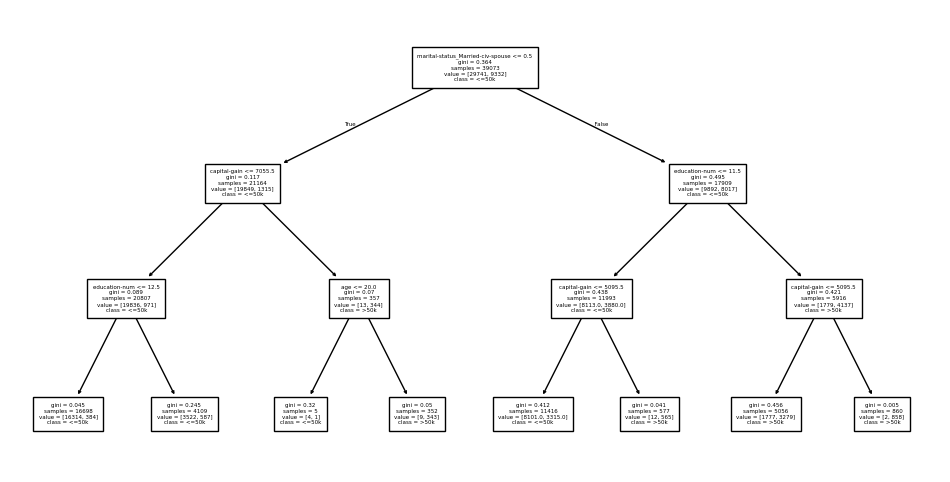

In [36]:
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X_train.columns, class_names=['<=50k', '>50k'], fontsize=4)
plt.show()

In [37]:
# Train evaluation
evaluate_model(y_train, dt.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        27941        1800
       income_>50K          4287        5045

***Error rate***
0.15578532490466562

***Precision***
0.5406129447063867


In [38]:
# Test evaluation
evaluate_model(y_test, dt.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6969         445
       income_>50K          1116        1239

***Error rate***
0.15979117616951583

***Precision***
0.5261146496815287


#### Bagging

In [139]:
bg = RandomForestClassifier(max_features=X_train.shape[1], random_state=42)
distributions = {"n_estimators": [50, 100, 200, 400],
                 "max_depth": [2, 4, 8, 16]}
bg_search = RandomizedSearchCV(bg, distributions, n_iter=10, random_state=0)
bg_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(max_features=25,
                                                    random_state=42),
                   param_distributions={'max_depth': [2, 4, 8, 16],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [140]:
bg_search.best_params_

{'n_estimators': 200, 'max_depth': 16}

In [141]:
# Train evaluation
evaluate_model(y_train, bg_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        26292         977
       income_>50K          2141        6767

***Error rate***
0.08618735660778948

***Recall***
0.75965424337674

***Precision***
0.8738378099173554

***F1 score***
0.812755224597646


In [142]:
# Test evaluation
evaluate_model(y_test, bg_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6360         385
       income_>50K           893        1407

***Error rate***
0.14129353233830846

***Recall***
0.6117391304347826

***Precision***
0.78515625

***F1 score***
0.6876832844574781


#### Random forests

In [ ]:
rf = RandomForestClassifier(random_state=42)
distributions = {"n_estimators": [50, 100, 200, 400],
              "max_features": ["sqrt", "log2"], 
              "max_depth": [2, 4, 8, 16]}
rf_search = RandomizedSearchCV(rf, distributions, n_iter=10, random_state=0)
rf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 400]})

In [44]:
rf_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [45]:
# Train evaluation
evaluate_model(y_train, rf_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        29740           1
       income_>50K             2        9330

***Error rate***
7.677936170757301e-05

***Precision***
0.9997856836690956


In [46]:
# Test evaluation
evaluate_model(y_test, rf_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6887         527
       income_>50K           915        1440

***Error rate***
0.14760978605793837

***Precision***
0.6114649681528662


#### Boosting

In [47]:
bst = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=1, random_state=42)
distributions = {"learning_rate": [0.01, 0.1],
                 "n_estimators": [50, 100, 200, 400],
                 "max_depth": [1, 2, 3]}
bst_search = RandomizedSearchCV(bst, distributions, n_iter=10, random_state=0)
bst_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(max_depth=1,
                                                        n_estimators=200,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [48]:
# Train evaluation
evaluate_model(y_train, bst_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        28297        1444
       income_>50K          3124        6208

***Error rate***
0.1169093747600645

***Precision***
0.6652378911273039


In [50]:
# Test evaluation
evaluate_model(y_test, bst_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         7027         387
       income_>50K           847        1508

***Error rate***
0.12631794451837444

***Precision***
0.6403397027600849


#### XGBoost

In [49]:
xgb = XGBClassifier(random_state=42)
distributions = {"learning_rate": [0.001, 0.01, 0.1],
                 "n_estimators": [50, 100, 200, 400],
                 "max_depth": [1, 2, 4, 8],
                 "base_score": [0.5],
                 "reg_lambda": [1, 2, 4, 8, 16],
                 "gamma": [1, 2, 4, 8, 16]}
xgb_search = RandomizedSearchCV(xgb, distributions, n_iter=20, random_state=0)
xgb_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'base_score': [0.5],
                                        'gamma': [1, 2, 4, 8, 16],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4, 8],
                                        'n_estimators': [50, 100, 200, 400],
                                        'reg_lambda': [1, 2, 4, 8, 16]},
                   random_state=0)

In [50]:
xgb_search.best_params_

{'reg_lambda': 8,
 'n_estimators': 400,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 1,
 'base_score': 0.5}

In [51]:
# Train evaluation
evaluate_model(y_train, xgb_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        25837        1432
       income_>50K          3416        5492

***Error rate***
0.13400779500787793

***Recall***
0.6165244723843736

***Precision***
0.7931831311380705

***F1 score***
0.6937847397675594


In [52]:
# Test evaluation
evaluate_model(y_test, xgb_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6399         346
       income_>50K           878        1422

***Error rate***
0.13532338308457711

***Recall***
0.6182608695652174

***Precision***
0.8042986425339367

***F1 score***
0.6991150442477877
